In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
crt_dataset = './Trimmed_MSD'

8
torch.Size([1, 512, 512, 369])
259
[0, 54, 108, 162, 216, 270]


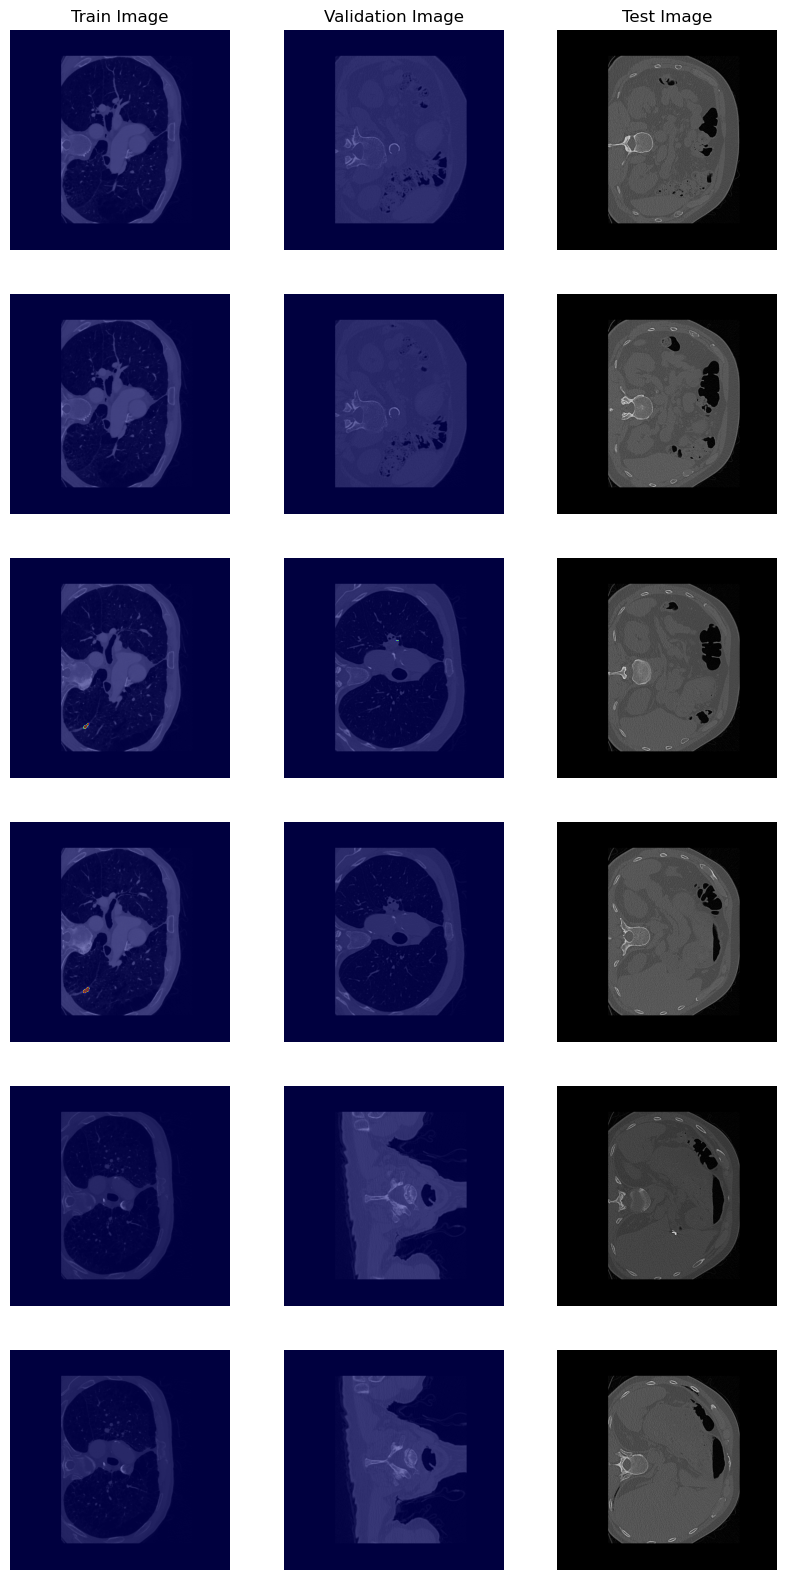

In [11]:

def get_first_patient(crt_path, split_name):
    ''' Returns the first patient in the given split '''

    img_path = os.path.join(crt_path, split_name, 'images/patient_0.pt')
    img = torch.load(img_path)
    
    if split_name == 'test':
        return img, None
    
    label_path =  os.path.join(crt_path, split_name, 'labels/patient_0.pt')
    label = torch.load(label_path)
    return img, label

def tumour_starting_idx(label):
    ''' Returns the starting index of the tumour in the label on the last dimension '''

    idx = -1
    for i in range(label.shape[-1]):
        if label[0, ..., i].sum() > 0:
            idx = i
            break

    return idx

def plot_slices(crt_path):
    ''' Plots first two, two tumorous and last two slices of the first patients in the training and validation sets on two columns '''

    train_img, train_label = get_first_patient(crt_path, 'training')
    tumour_idx_tr = tumour_starting_idx(train_label)
    print(tumour_idx_tr)
    plotting_indices_tr = [0, 1, tumour_idx_tr, tumour_idx_tr + 1, -2, -1]

    val_img, val_label = get_first_patient(crt_path, 'validation')
    print(val_label.shape)
    tumour_idx_val = tumour_starting_idx(val_label)
    plotting_indices_val = [0, 1, tumour_idx_val, tumour_idx_val + 1, -2, -1]
    print(tumour_idx_val)

    test_img, _ = get_first_patient(crt_path, 'test')
    # take 6 slices evenly up to shape[-1]
    plotting_indices_test = np.linspace(0, test_img.shape[-1] - 1, 6).astype(int).tolist()
    print(plotting_indices_test)


    fig, axes = plt.subplots(6, 3, figsize=(10, 20))

    # Put title for each column
    axes[0, 0].set_title('Train Image')
    axes[0, 1].set_title('Validation Image')
    axes[0, 2].set_title('Test Image')
    
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            if col == 0:
                axes[row, col].imshow(train_img[0, ..., plotting_indices_tr[row]], cmap='gray')
                axes[row, col].imshow(train_label[0, ..., plotting_indices_tr[row]], cmap='jet', alpha=0.5)
            elif col == 1:
                axes[row, col].imshow(val_img[0, ..., plotting_indices_val[row]], cmap='gray')
                axes[row, col].imshow(val_label[0, ..., plotting_indices_val[row]], cmap='jet', alpha=0.5)
            else:
                axes[row, col].imshow(test_img[0, ..., row*10], cmap='gray')

            axes[row, col].axis('off')


plot_slices(crt_dataset)